<a href="https://colab.research.google.com/github/Smash08/Projeto-Doencas-CardioVasculares/blob/main/An%C3%A1lise_Explorat%C3%B3ria_e_Modelo_Preditivo_dataset_doen%C3%A7as_cardiovasculares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DOENÇAS CARDIOVASCULARES - ANÁLISE EXPLORATÓRIA + MACHINE LEARNING

Doenças cardiovasculares contém diferentes tipos de doenças que afetam de alguma maneira o coração ou os vasos sanguíneos. Algumas doenças que afetam são: comoangina de peito, cardiopatia, arritmia cardíaca e aneurisma da aorta.

As doenças cardiovasculares são umas das principais causas de morte em todo o mundo, entretanto poderia se evitar  90% dos casos por meio da adoção de algumas medidas e mudanças na maneira de viver.

Nos dias atuais, há varias pesquisas na área de Machine Learning visando  construções de modelos preditivos que auxiliem os profissionais de saúde na identificação de doenças desses gênero em seus pacientes.

Estudos publicados pela revista Nature Biomedical Engineering demostram um bom indice de eficiência, nos quais foram possívels antencipar se os pacientes teriam ou não doenças cardíacas em até 5 anos - utilizando-se de algoritmos de Deep Learning.

Desta forma, podemos vislumbrar que o uso de Inteligência Artificial tem importantíssimo papel na área da saúde, proporcionado aos profissionais médicos informações cada vez mais precisos



##OBTENÇÃO DOS DADOS

O conjunto principal de dados usado neste projeto foi coletado da Cleveland Clinic Foundation e se encontra disponível no conhecido Repositório UCI Machine Learning. Ressalta-se que os nomes, identidade e documentos pessoais dos pacientes foram removidos completamente do banco de dados.

O dataset processado contém dados de 303 pessoas e 76 atributos. Entretanto, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de Data Science usará essas mesmas 14 variáveis principais.
[link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv)

Há ainda um *dataset* secundário que será utilizado para ver a evolução no número de mortes por doenças cardiovasculares no Brasil (entre os anos de 2004-2017). Esses dados foram disponibilizados pela [Sociedade Brasileira de Cardiologia](http://www.cardiometro.com.br/anteriores.asp), e podem ser baixados [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv).

##INFORMAÇÕES SOBRE ATRIBUTO

* `age` - idade em anos
* `sex` - sexo do paciente
  * 0: mulher
  * 1: homem
* `cp` - tipo da dor torácica
  * 1: angina típica
  * 2: angina atípica
  * 3: dor não cardíaca
  * 4: assintomática
* `trestbps` - pressão arterial em repouso
* `chol` - colesterol sérico (*mg/dl*)
* `fbs` - açucar no sangue em jejum > 120*mg/dl*
  * 0: `False`
  * 1: `True`
* `restecg` - resultado do eletrocardiografia de repouso
  * 0: normal
  * 1: anormalidades de ST-T  (inversão da onda T e elevação ou depressão de > 0.05*mV*)
  * 2: hipertrofia ventricular esquerda provável ou definitiva (pelos critérios de Romhilt-Estes)
* `thalach` - frequência cardíaca máxima atingida
* `exang` - angina induzida pelo exercício
  * 0: não
  * 1: sim
* `oldpeak` - depessão do segmento ST induzida pelo exercício em relação ao repouso
* `slope` - inclinação do segmento ST no pico do exercício
* `ca` - número de vasos principais colorido por fluoroscopia
* `thal` - *thallium stress test*
  * 3: normal
  * 6: defeito fixo
  * 7: defeito reversível
* `num` - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  * 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  * 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)


###Importar dados

Para iniciar a nossa análise, iremos importar os dois dataset linkados no inicio do projeto

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from warnings import simplefilter
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix

In [ ]:
sns.set_style
dataset_uci = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"
dataset_brasil = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/mortes_doencas_cardiovasculares.csv"

In [ ]:
# importar dataset da UCI
df = pd.read_csv(dataset_uci)

#importar dataset dos indíces do Brasil
df_brasil = pd.read_csv(dataset_brasil)

In [ ]:
df_brasil.head()

,ano,mortes_doencas_cardio
0,2017,383.961
1,2016,362.091
2,2015,349.584
3,2014,340.284
4,2013,339.672


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# variável alvo antes
df.num.value_counts()

0    164
1     55
2     36
3     35
4     13
Name: num, dtype: int64

In [ ]:
# converter valores >= 1 em 1
df.loc[df.num != 0, 'num'] = 1

In [ ]:
# variável alvo depois
df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

###ANÁLISE EXPLORATÓRIA

In [ ]:
print(f'Tamanho do dataset UCI : {df.shape}')
print(f'Tamanho do dataset Brasil: {df_brasil.shape}')

Tamanho do dataset UCI : (303, 14)
Tamanho do dataset Brasil: (14, 2)


In [ ]:
print('Resumo estatistico:')
display(df.describe())

Resumo estatiscio:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.722772,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.938383,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


A Média de idade está em 54 anos, a média de frequência cardiaca atingida (thalach) é de 150, além disso a media de pressão arterial é de 131 - valores altos. Assim como, o colestorol que tem uma média de 247, sendo que o ideal é até 200

In [ ]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [ ]:
#Fazendo a contagem de quantas pessoas tem doenças cardiacas
num_Freq = df.num.value_counts()

print(f'Não tem doença Cardiovascular: {num_Freq[0]}, representa {num_Freq[0]/df.shape[0]*100 :.2f}% do dataset')
print(f'Tem doença Cardiovascular: {num_Freq[1]}, representa {num_Freq[1]/df.shape[0]*100 :.2f}% do dataset')



Não tem doença Cardiovascular: 164, representa 54.13% do dataset
Tem doença Cardiovascular: 139, representa 45.87% do dataset


###Verificando valores ausentes

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
df_brasil.isnull().sum()

ano                      0
mortes_doencas_cardio    0
dtype: int64

###GRÁFICOS

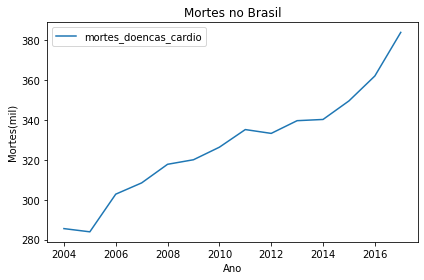

In [ ]:
fig, ax = plt.subplots()
df_brasil.plot('ano','mortes_doencas_cardio', ax=ax)

ax.set_title('Mortes no Brasil')
ax.set_xlabel('Ano')
ax.set_ylabel('Mortes(mil)')

plt.tight_layout()


Percebe-se que é uma reta está em uma crescente, em consulta ao site cardiômetro ([link](http://www.cardiometro.com.br/anteriores.asp)), o mesmo relata que em 2017 estima-se que 383.961 faleceram por doenças cardiovasculares, já dois anos depois, em 2019 estima-se que foram mais de 289 mil pessoas, segundo o site de notícia Agência Brasil.

Hoje (29/09/21), o total de mortes já chegou ao patamar de  300.295 pessoas.

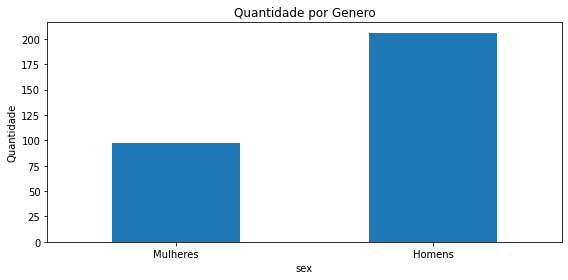

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))

df.groupby(['sex']).sex.count().plot(kind='bar',ax=ax);

#Modificando o nome dos ticket
xtick= ['Mulheres', 'Homens']
x = np.arange(2)
plt.xticks(x, xtick, rotation=0)

#Colocando  titulo
plt.title('Quantidade por Genero')
#Colocando legenda no eixo y
plt.ylabel('Quantidade')
   
plt.tight_layout()



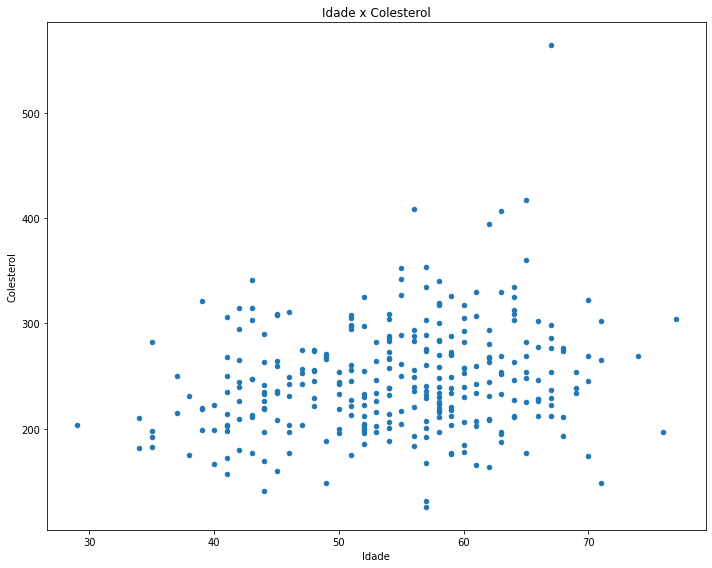

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

df.plot.scatter(x='age', y='chol',ax=ax)
ax.set_title('Idade x Colesterol')
ax.set_xlabel('Idade')
ax.set_ylabel('Colesterol')

plt.tight_layout()

Ao plotar o gráfico de disperssão é possível perceber que não há uma correlação entre Colestoral e a idade

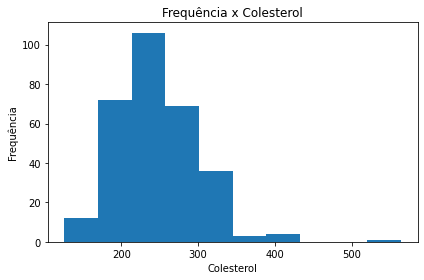

In [ ]:


fig, ax = plt.subplots()
sns.set
df["chol"].plot(kind='hist', bins=10, ax=ax)

ax.set_title('Frequência x Colesterol')
ax.set_xlabel('Colesterol')
ax.set_ylabel('Frequência')
plt.tight_layout()

Os maiores níveis de colestol se encontram a cima de 200, conforme dito alhures, é um número bastante perigoso, pois o normal é 200.

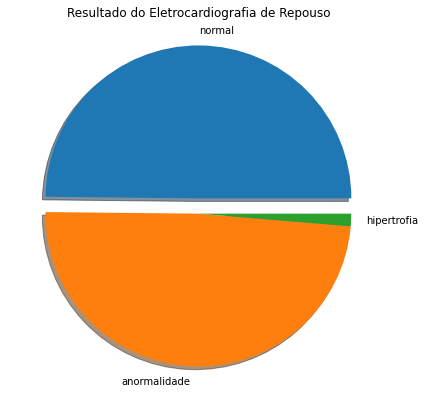

In [ ]:
# extrair as ocorrências para um dicionário
restecg = dict(df.restecg.value_counts())

# preparar dados para o pie chart
labels = 'Normal', 'Anormalidade','Hipertrofia'
sizes = restecg.values()
explode = (0.1, 0, 0)

#plotando
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(sizes, labels=labels, explode=explode, shadow=True)

ax.set_title('Resultado do Eletrocardiografia de Repouso')

plt.tight_layout()

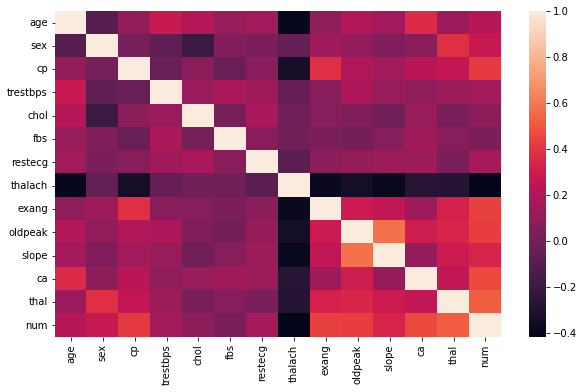

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df.corr(), ax=ax)
plt.show()

In [ ]:
corr = df.corr()
corr_list = corr['num'].sort_values(axis=0,ascending=False).iloc[1:]
corr_list

thal        0.522057
ca          0.460033
exang       0.431894
oldpeak     0.424510
cp          0.414446
slope       0.339213
sex         0.276816
age         0.223120
restecg     0.169202
trestbps    0.150825
chol        0.085164
fbs         0.025264
thalach    -0.417167
Name: num, dtype: float64

Análisando o heatmap, principalmente no que tange as correlações da coluna num - representa as pessoas que tiveram e não tiveram doença cardiovascular, é possível perceber que há uma relação entre algumas variaveis, quais sejam exang **(angina induzida pelo exercício)**, ca**(número de vasos principais colorido por fluoroscopia)**, thal **(tipo da dor torácica)**

##MACHINE LEARNING

Neste tópico usaremos modelo preditivo para tentar prever e verificar qual perfomace melhor.

A minha primeira tentativa foi com **XGBoost**, obtendo uma acurácia de  81%, após isso tente o **Decision Tree** obtendo 76% de acurácia, após isso tentei implementar a **Random Forest** no intuito de obter uma acurácia melhor, entretanto houve-se um aumento de 1%, obtive o resultado de 77%

Separando features

In [ ]:
# Separando a classe dos Dados
previsores = df.drop('num',axis=1)
classe = df['num']

In [ ]:
clf =RandomForestClassifier(n_estimators=100, random_state=7)
clf.fit(previsores, classe)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=previsores.columns).sort_values(ascending=False)
feature_imp

ca          0.126027
cp          0.126022
thalach     0.116257
oldpeak     0.104537
thal        0.098342
age         0.089750
chol        0.081859
trestbps    0.077108
exang       0.066902
slope       0.050558
sex         0.030958
restecg     0.021215
fbs         0.010465
dtype: float64

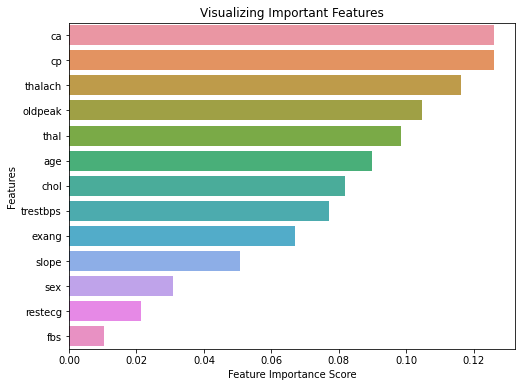

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
ax.set_title("Visualizing Important Features")
plt.show();

In [ ]:
# Selecionando as features de maior importância.

features_selected = []
for feature,importance in feature_imp.iteritems():
    if importance > 0.03:
        print(f'{feature}: {round(importance * 100)}%')
        features_selected.append(feature)



ca: 13%
cp: 13%
thalach: 12%
oldpeak: 10%
thal: 10%
age: 9%
chol: 8%
trestbps: 8%
exang: 7%
slope: 5%
sex: 3%


In [ ]:
#treinando os modelo apenas com as features selecionadas
previsores = df[features_selected]
classe = df['num']


##Avaliação dos modelos de Machine Learning

In [ ]:


pipelines = []

pipelines.append(('Scaled-LR', Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('Scaled-KNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('Scaled-CART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))
pipelines.append(('Scaled-NB', Pipeline([('Scaler', StandardScaler()), ('NB',GaussianNB())])))
pipelines.append(('Scaled-RF', Pipeline([('Scaler', StandardScaler()), ('RF', RandomForestClassifier())])))
pipelines.append(('Scaled-XG', Pipeline([('Scaler', StandardScaler()), ('XGB', XGBClassifier())])))

resultados =[]
nomes= []




#Percorrendo cada um dos modelos

for nome, modelo  in pipelines:
    kfold= StratifiedKFold(n_splits =10, shuffle=True, random_state=7)
    cross_val_result = model_selection.cross_val_score(modelo,
                                                       previsores,
                                                       classe,
                                                       cv=kfold,
                                                       scoring='accuracy')
    resultados.append(cross_val_result)
    nomes.append(nome)
    texto ="%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)

Scaled-LR: 0.831290 (0.072576)
Scaled-KNN: 0.808602 (0.054710)
Scaled-CART: 0.733011 (0.070569)
Scaled-NB: 0.851183 (0.058039)
Scaled-RF: 0.834516 (0.057900)
Scaled-XG: 0.805054 (0.054769)


De acordo com os resultados anteriores, os modelos criados com Gaussian e Random Forest apresentaram 
os melhores valores de acurácia e portanto os melhores resultados.
Isso pode ser confirmado, comparando os algoritmos através de boxplots a seguir:

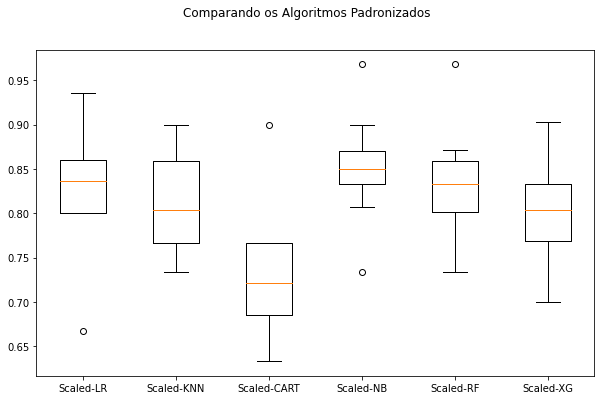

In [ ]:
fig = plt.figure(figsize=(10,6))
fig.suptitle('Comparando os Algoritmos Padronizados')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

#Tunning dos modelos criados com Random Forest

In [ ]:
# Definindo a escala
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

#Possiíveis valores de estimators
val_estimators= [20, 50, 100, 150, 200]

#Possíveis valores para o critério de divisão
val_criterion = ['gini', 'entropy']

#definindo max_depth
max_depth = list(range(1, 31))

# Definindo um dicionário que recebe as listas de parâmetros e valores
valores_grid = dict(criterion = val_criterion,
                    max_depth = max_depth,
                    n_estimators = val_estimators)

#Definindo um dicionário que recebe as litaas de parâmetros e valores
parametros_gri = dict(n_estimators = val_estimators,
                      criterion = val_criterion)

#Criando o modelo
modelo_random = RandomForestClassifier()

#Definindo K
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

#testando diferentes combinações com os parâmetros
grid = RandomizedSearchCV(estimator=modelo_random, 
                          param_distributions=parametros_gri, 
                          cv =kfold, scoring = 'accuracy')
grid.fit(previsores, classe)

#Resultado:
print("Grid Score on development set:")
means = grid.cv_results_['mean_test_score'].round(5)
stds = grid.cv_results_['std_test_score'].round(5)


for mean, std, params in zip(means, stds, grid.cv_results_['params']):
  print(f'mean:{mean} std:{std}, params:{params}')
print()
print(f'Melhor parâmetro:{grid.best_params_}, \nScore:{grid.best_score_}')

Grid Score on development set:
mean:0.81516 std:0.06221, params:{'n_estimators': 20, 'criterion': 'gini'}
mean:0.83462 std:0.08005, params:{'n_estimators': 50, 'criterion': 'gini'}
mean:0.8214 std:0.06393, params:{'n_estimators': 100, 'criterion': 'gini'}
mean:0.82806 std:0.05509, params:{'n_estimators': 150, 'criterion': 'gini'}
mean:0.8314 std:0.05824, params:{'n_estimators': 200, 'criterion': 'gini'}
mean:0.82495 std:0.05329, params:{'n_estimators': 20, 'criterion': 'entropy'}
mean:0.82161 std:0.05422, params:{'n_estimators': 50, 'criterion': 'entropy'}
mean:0.82151 std:0.05251, params:{'n_estimators': 100, 'criterion': 'entropy'}
mean:0.83796 std:0.06032, params:{'n_estimators': 150, 'criterion': 'entropy'}
mean:0.82151 std:0.05944, params:{'n_estimators': 200, 'criterion': 'entropy'}

Melhor parâmetro:{'n_estimators': 150, 'criterion': 'entropy'}, 
Score:0.8379569892473118


#CONCLUSÃO:

Haja vista Random Forest ser o segundo modelo preditivo, tentei melhora-lo para ver se era possível obter um melhor resultado frente ao modelo Gaussiano, entreanto não alcançou o resultado desejável.

Sendo assim o Gaussiano é melhor modelo a ser utilizado no presente projeto.
